# The Office

***The Office*** is an American television sitcom broadcast on NBC. Created as an adaptation by Greg Daniels of the British series of the same name, it is a mockumentary that follows the day-to-day lives of the employees of the Scranton, Pennsylvania branch of **Dunder Mifflin**, a fictional paper supply company. The show aired from March 24, 2005, to May 16, 2013, with a total of nine seasons consisting of **201 episodes**.

![The Office](best-episodes-of-the-office.webp)


In [1]:
import pandas as pd
import matplotlib as plt

In [3]:
data = pd.read_csv("the_office_data.csv", sep=";")
data['Views (in mln)'] = data['Views (in mln)'].str.replace(',', '.').astype(float)
data['IMDB Rating'] = data['IMDB Rating'].str.replace(',', '.').astype(float)
data['Change'] = data['Views (in mln)'].pct_change()* 100

In [16]:
data.head()

,Number,Season,Episode,Title,Views (in mln),IMDB Rating,Unnamed: 6,Unnamed: 7,Change
0,1,1,1,Pilot,10.23,7.3,NaN,NaN,NaN
1,2,1,2,Diversity Day,5.95,8.1,NaN,NaN,-41.837732
2,3,1,3,Health Care,5.83,7.6,NaN,NaN,-2.016807
3,4,1,4,The Alliance,5.26,7.8,NaN,NaN,-9.777015
4,5,1,5,Basketball,5.03,8.2,NaN,NaN,-4.372624


In [18]:
data.describe()

,Number,Season,Episode,Views (in mln),IMDB Rating,Unnamed: 6,Unnamed: 7,Change
count,201.000000,201.000000,201.000000,201.000000,201.000000,0.0,0.0,200.000000
mean,101.000000,5.452736,12.547264,7.390299,8.115423,NaN,NaN,0.868133
std,58.167861,2.364108,7.340913,2.307661,0.660008,NaN,NaN,17.124280
min,1.000000,1.000000,1.000000,3.250000,6.300000,NaN,NaN,-62.985596
25%,51.000000,3.000000,6.000000,6.080000,7.700000,NaN,NaN,-6.661759
50%,101.000000,6.000000,12.000000,7.660000,8.100000,NaN,NaN,0.000000
75%,151.000000,7.000000,19.000000,8.510000,8.500000,NaN,NaN,5.689022
max,201.000000,9.000000,28.000000,22.910000,9.800000,NaN,NaN,161.529680


We can see that the total average of the viewership for the show is **7,4 millions**, with the highest viewership of **26 million** and the lowest of **2 million**. The average IMDB rating is **8.4**, with the highest rating of **9.8** and the lowest of **6.3**.

## Viewership

***

<Axes: title={'center': 'Views of The Office Episodes'}, xlabel='Episodes', ylabel='Views (in mln)'>

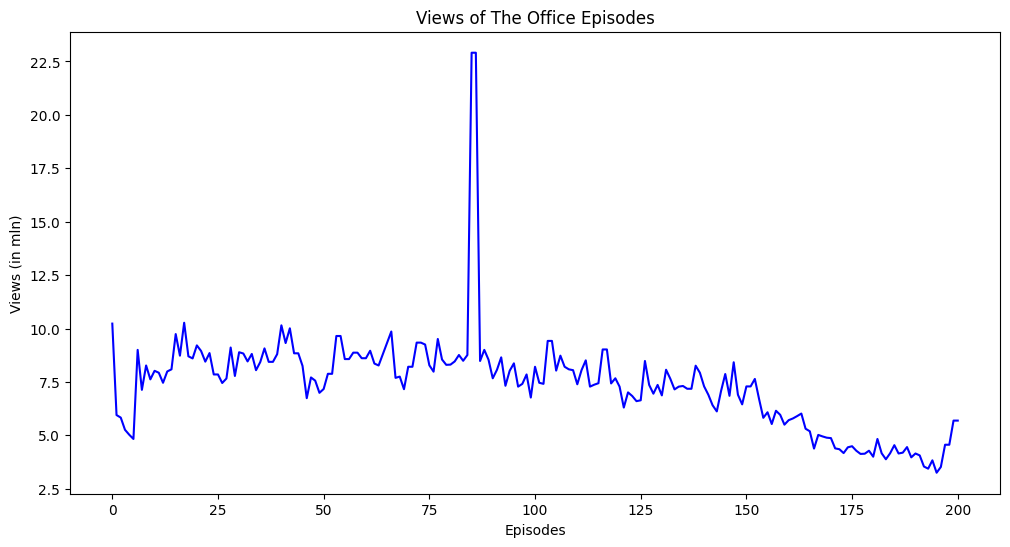

In [4]:
data['Views (in mln)'].plot(figsize=(12, 6), title='Views of The Office Episodes', xlabel='Episodes', ylabel='Views (in mln)', color='blue')

We can see that the views of the episodes are decreasing over time. Starting at around 8 milion views in the first season, the viewership peaked at around 26 million in season 5 and then started to decline. The last season had the lowest viewership, with only around 4 million views.

What is interesting is the outlier of **season 5, episode 14 and 15** called ***Stress Relief***. The episode was aired after the Super Bowl, which is a common practice for shows to gain more viewers. The episode had a viewership of 26 million, which is significantly higher than the average viewership of the other episodes.

<Axes: title={'center': 'Average Views of The Office Episodes'}, xlabel='Seasons', ylabel='Average Views (in mln)'>

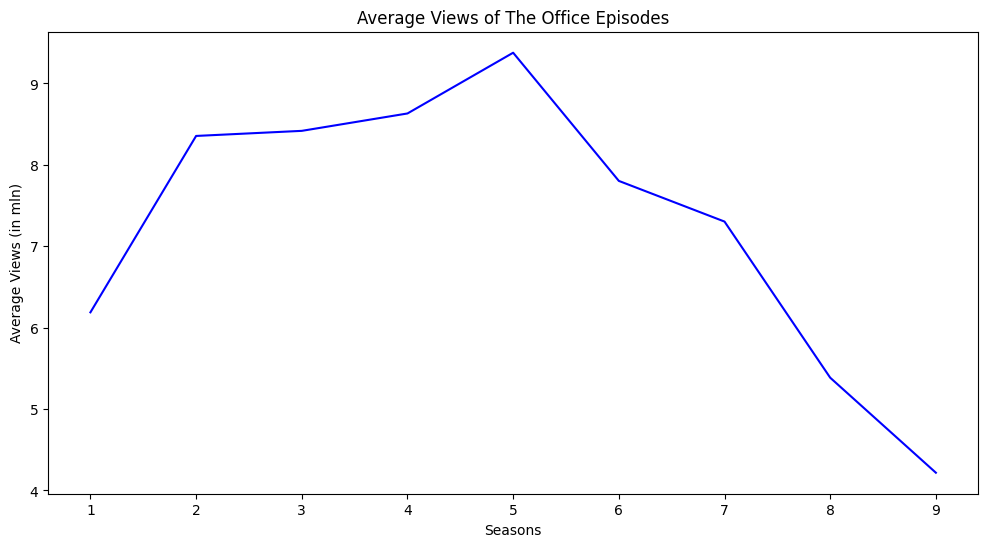

In [5]:
data.groupby('Season')['Views (in mln)'].mean().plot(figsize=(12, 6), title='Average Views of The Office Episodes', xlabel='Seasons', ylabel='Average Views (in mln)', color='blue')

In [12]:
average_views = data.groupby('Season')['Views (in mln)'].mean()
drop = ((average_views[9] - average_views[5])/average_views[5] * 100).round(2)
print('Drop in views between the season 5 and 9:', drop , '%')

Drop in views between the season 5 and 9: -55.02 %


The average viewership of each season is presented on the chart above. We can see that the audience number peaked in season 5 and then started to decline. The last season had the lowest viewership, which is common for long-running shows as they tend to lose their audience over time. Views between season 5 and 9 dropped by **55%**.

## IMDB Ratings

***

<Axes: title={'center': 'IMDB Ratings of The Office Episodes'}, xlabel='Episodes', ylabel='IMDB Rating'>

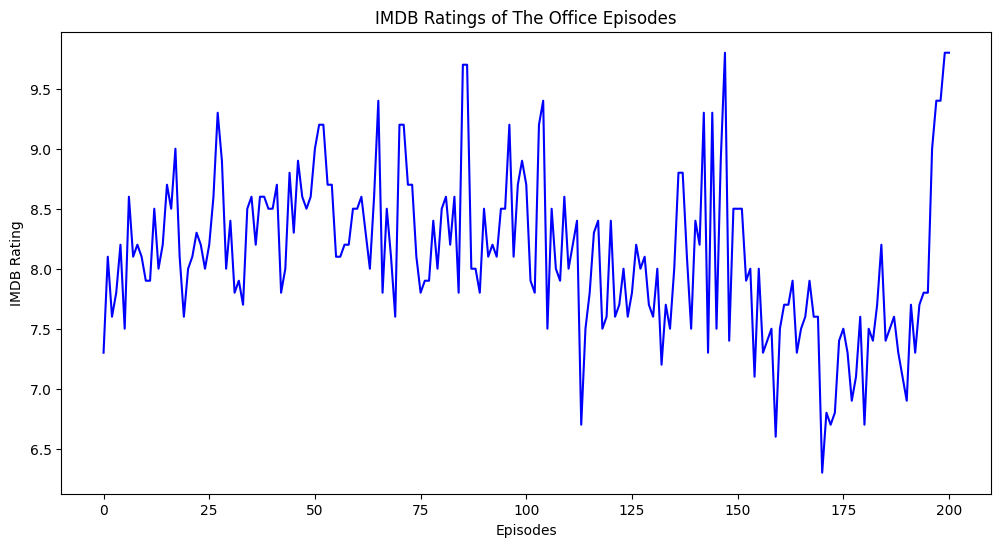

In [7]:
data['IMDB Rating'].plot(figsize=(12, 6), title='IMDB Ratings of The Office Episodes', xlabel='Episodes', ylabel='IMDB Rating', color='blue')

We also see that the IMDB ratings of the episodes are decreasing over time. The ratings peaked at around **9.5** in season 4 and then started to decline. The last season had the lowest ratings, with only around **7.5**. The finale episode has a rating of **9.8**, which is significantly higher than the average rating of the other episodes in the last 2 seasons.

<Axes: title={'center': 'Average IMDB Ratings of The Office Episodes'}, xlabel='Seasons', ylabel='Average IMDB Rating'>

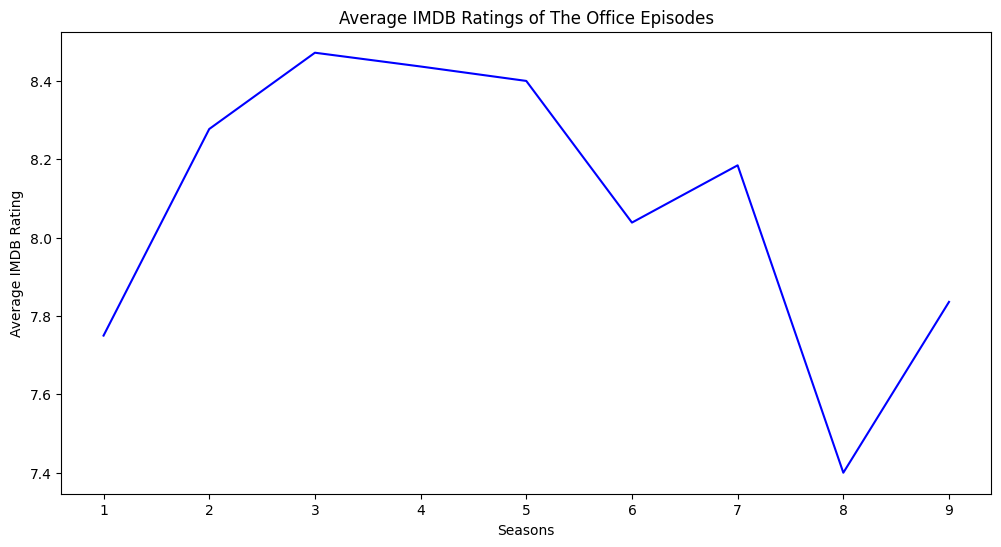

In [89]:
data.groupby('Season')['IMDB Rating'].mean().plot(figsize=(12, 6), title='Average IMDB Ratings of The Office Episodes', xlabel='Seasons', ylabel='Average IMDB Rating', color='blue')

The average ratings of each season is presented on the chart above. We can see that the ratings peaked in season 4 and then started to decline. The last season had the lowest ratings, which is common for long-running shows as they tend to lose their audience over time. Ratings between season 4 and 8 dropped by **12%**.

In [15]:
average_rank = data.groupby('Season')['IMDB Rating'].mean()
drop = ((average_rank[8] - average_views[3])/average_views[3] * 100).round(2)
print('Drop in IMDB rating between the season 3 and 8:', drop , '%')

Drop in IMDB rating between the season 3 and 8: -12.09 %


## Correlation between Views and IMDB Ratings

***

We calculated the correlation between the views and IMDB ratings of the episodes. The correlation is **0.485**, which means that there is a moderate positive correlation between the two variables. This means that as the viewership increases, the IMDB ratings also tend to increase.

In [90]:
data['IMDB Rating'].corr(data['Views (in mln)'])

np.float64(0.48518959252697585)

***

<Axes: title={'center': 'Percentage Change of The Office Episodes Audience Number'}, xlabel='Episodes', ylabel='Change'>

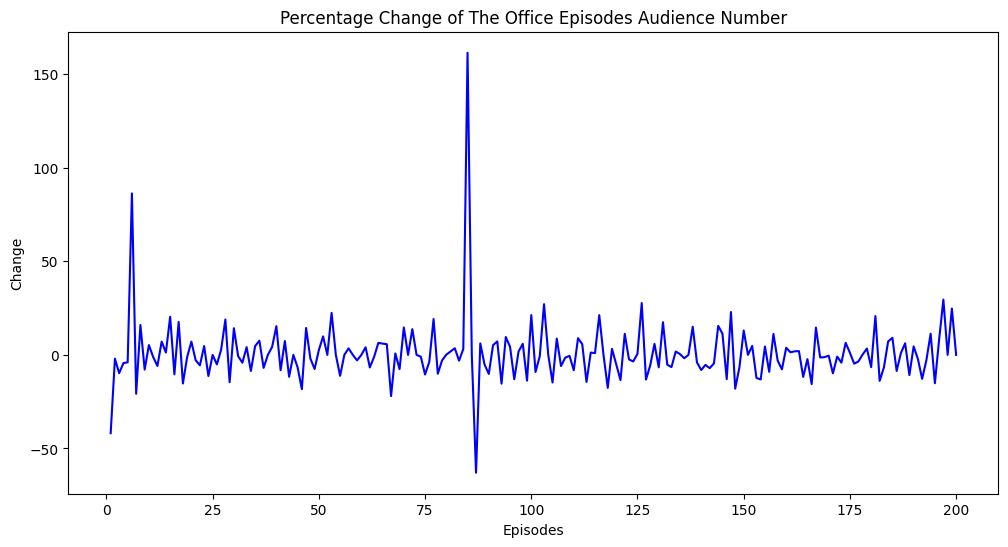

In [82]:
data['Change'].plot(figsize=(12, 6), title='Percentage Change of The Office Episodes Audience Number', xlabel='Episodes', ylabel='Change', color='blue')